In [1]:
import torch
from torchvision import transforms

from PIL import Image

from model import WordscapesOCRModel

In [4]:
model = WordscapesOCRModel()
model.load_state_dict(torch.load('lightning_logs/version_0/checkpoints/ocr_model-epoch=27-val/loss=0.33.ckpt')['state_dict'])

<All keys matched successfully>

In [5]:
transform = transforms.Compose([
    transforms.Resize((64, 64), antialias=True),
    transforms.ToTensor(),
])

In [9]:
# image = Image.open('data/P/00000.png').convert('L')
image = Image.open('p.png').convert('L')
image = transform(image)

with torch.no_grad():
    output = model.model(image.unsqueeze(0))

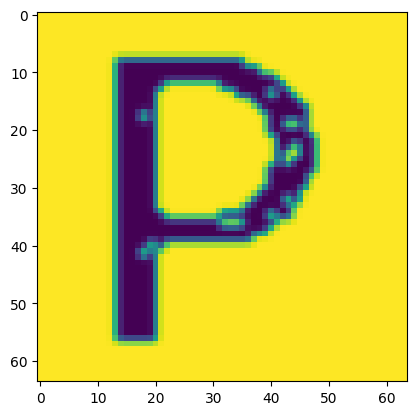

In [10]:
import matplotlib.pyplot as pyplot

pyplot.imshow(image[0])

In [11]:
temp_output = output.clone()
t1 = torch.argmax(temp_output)
temp_output[0][t1] = 0
t2 = torch.argmax(temp_output)
temp_output[0][t2] = 0
t3 = torch.argmax(temp_output)
    
l1 = chr(t1.item() + ord('a'))
l2 = chr(t2.item() + ord('a'))
l3 = chr(t3.item() + ord('a'))

l1, l2, l3

('i', 'f', 'p')